# Problem Statement - CV Session-1

## Task 1: Edge Detection using Difference of Gaussians

In the session we have come across the Gaussian Filter for blurring an image. If you use two Gaussians filters of different sizes (having different standard deviations) and find their difference, it acts like a band pass filter and can detect edges. 

So try this out on the following image:

![](
https://github.com/sgauthamr2001/cv-session/raw/main/media/einstein.jpg
)

Perform Gaussian Blurring with kernels of size 5x5 and 9x9 and find their difference and see the output. 



In [ ]:
!git clone https://github.com/sgauthamr2001/cv-session.git

Cloning into 'cv-session'...
remote: Enumerating objects: 76, done.
remote: Total 76 (delta 0), reused 0 (delta 0), pack-reused 76
Unpacking objects: 100% (76/76), done.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

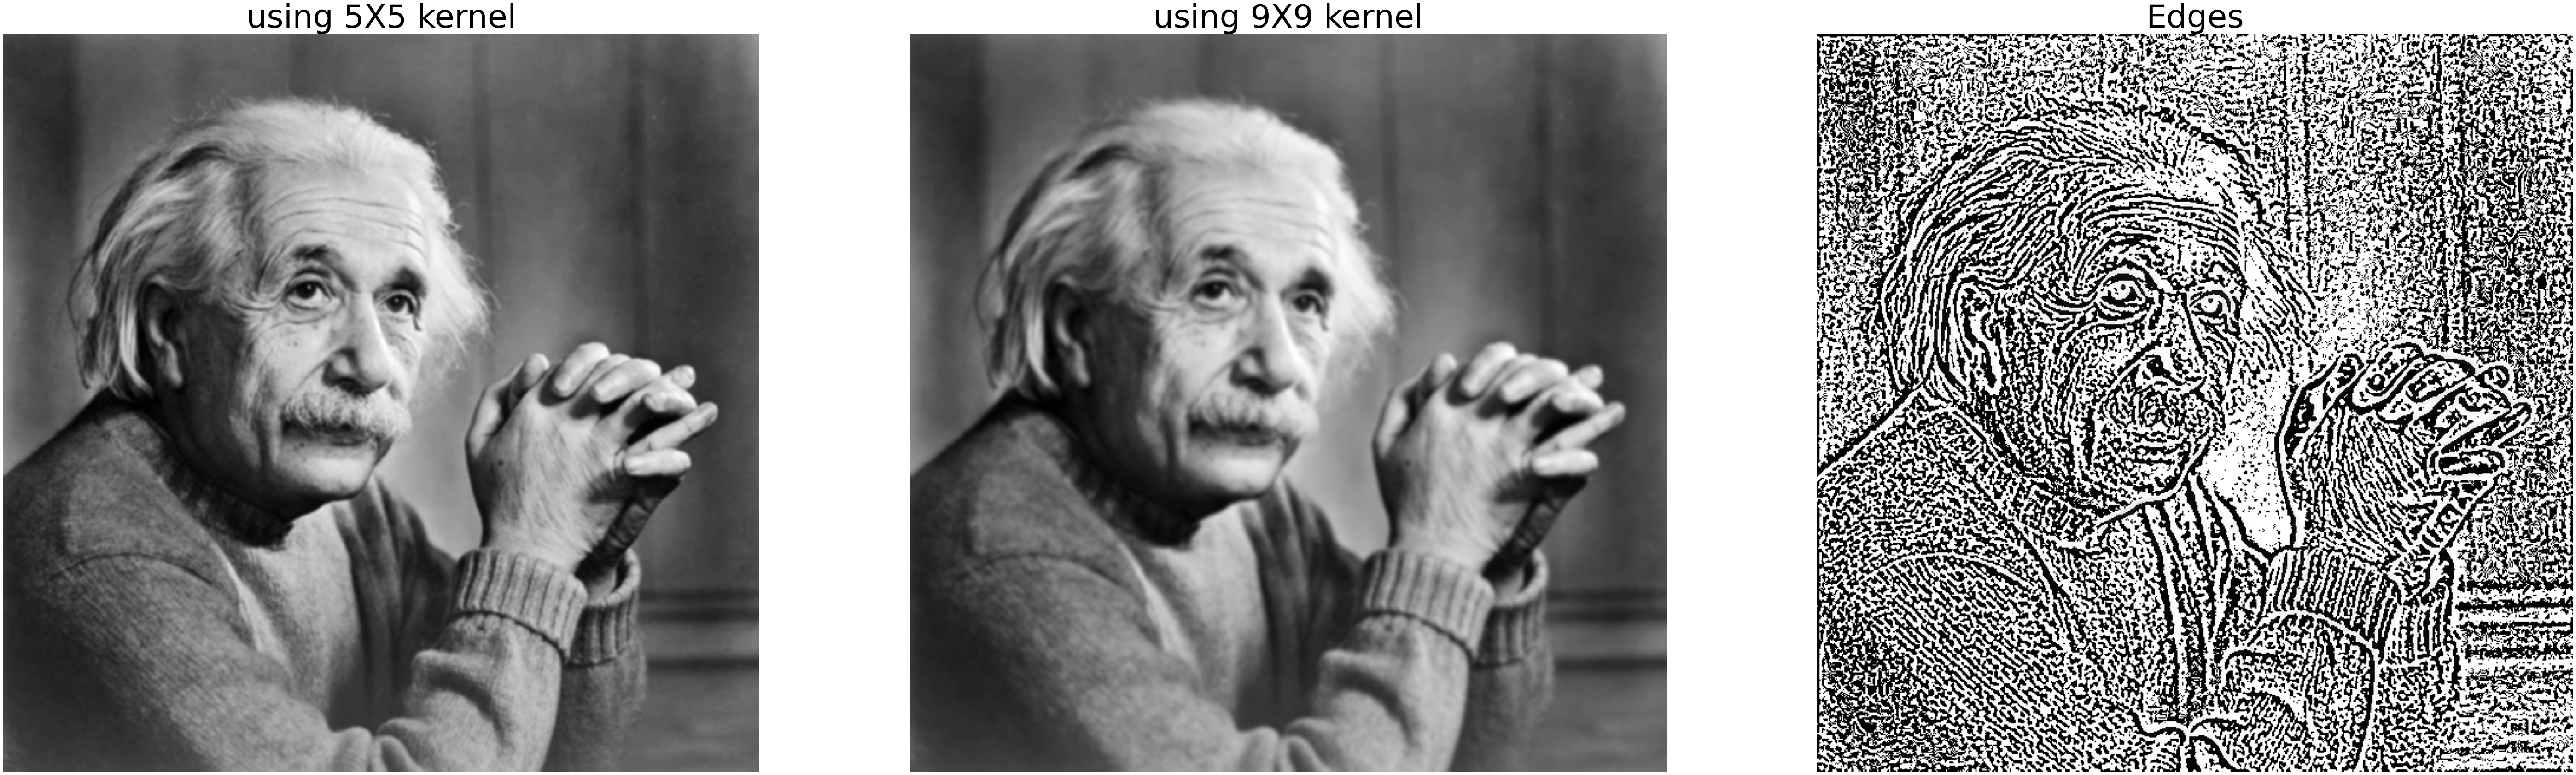

In [ ]:
img = cv2.imread('/content/cv-session/media/einstein.jpg', 0)
Blur5 = cv2.GaussianBlur(img, (5, 5), 0)
Blur9 = cv2.GaussianBlur(img, (9, 9), 0)
Diff = Blur5 - Blur9
fontdict = {'font'}

plt.figure(figsize=(100, 400))
plt.subplot(131), plt.imshow(Blur5, cmap = 'gray'), plt.title('using 5X5 kernel', fontsize = 70), plt.axis('off')
plt.subplot(132), plt.imshow(Blur9, cmap = 'gray'), plt.title('using 9X9 kernel', fontsize = 70), plt.axis('off')
plt.subplot(133), plt.imshow(Diff, cmap = 'gray'), plt.title('Edges', fontsize = 70), plt.axis('off')
plt.show()
 


## Task 2: Template Matching using Histograms

The task is to recognise the orange and white barrels in this [video](https://www.youtube.com/watch?v=A9BVr7kltl8). You will be using histogram backprojection to do so. Try to understand how 'cv2.calcBackProject()' works for this. 

The following are the steps you will roughly have to follow: 

* Get an image of the region of interest(the barrel), convert this to HSV from RGB. This is what you will be using for template matching. 

* Open your video using cv2.VideoCapture(), and convert your frame to HSV

* Calculate the histogram of your object using the cv2.calcHist() function. Normalize your histogram, and apply histogram backprojection using cv2.normalize() and cv2.calcBackProject(). 

* Let the result after calculating backproject be 'res'. Now to visualize 'res' better, we shall convolve with a circular disc.

``` 
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
```

* Threshold your image. Try out different values for best results.

* Merge the thresholded matrices to get a 3 channel image

```
final = cv2.merge((thresh,thresh,thresh))
```

* Perform a bitwise or of 'final' with the target image and display the output

```
result = cv2.bitwise_or(target_img, final)
```

If this gives good results you can also go ahead and try to identify the white lines bounding the path. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
import cv2
import numpy as np

codec = cv2.VideoWriter_fourcc(*'mp4v')


video = cv2.VideoCapture('/content/drive/MyDrive/CV Pics/videoplayback.mp4')
frame_width = int(video.get(3))
frame_height = int(video.get(4))
   
size = (frame_width, frame_height)
iter=cv2.VideoWriter('final-video.mp4', codec, 30, size)
tframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
#print(tframes)

for i in range(int(tframes)-6750):


    _, img = video.read()
    roi = cv2.imread('/content/drive/MyDrive/CV Pics/Barrel.png', 1)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)


    roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
    normalized = cv2.normalize(roi_hist, np.zeros((180, 256)), 0, 255, cv2.NORM_MINMAX)  
    res = cv2.calcBackProject([hsv_img], [0, 1], roi_hist, [0, 180, 0, 256], 1)
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    res = cv2.filter2D(res, -1, disc)
    ret, thresh = cv2.threshold(res, 75, 255, cv2.THRESH_BINARY)

    kernel = np.ones((11, 11))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    final = cv2.merge((thresh,thresh,thresh))
    result = cv2.bitwise_or(img, final)


    iter.write(result)

iter.release()




